**TLDR of what we are going to do:**

Step 1: Importing all the required packages and dataset for the assignment

Step 2: Data preprocessing

* Step 2A: Cleaning up the data of missing/NaN values
* Step 2B: Cleaning up the data of 0 values
* Step 2C: Dealing with categorical values
* Step 2D: Checking Variance
* Step 2E: Checking Correlation
* Step 2F: Dealing with duplicate rows in the data
* Step 2G: Outlier Removal
* Step 2H: Z score normalisation and oulier removal
* Step 2I: Splitting the data into train and test set

Step 3: Logistic regression with multiple variable (multivariate)

* Step 3A: Deciding on the input feature/variable (feature reduction)
* Step 3B: Deciding on the output or predicted variable/feature
* Step 3C: Running gradient descent

Step 4: Testing against test data

Step 5: Calculating F1 score

**Step 1 : Importing all the required packages and dataset for the assignment**

We will be using Numpy Library to use the mathematical functions needed. Within Numpy, we will use Numpy.linalg sub package for specific linear algebra functions

We will also use Pandas library for easy data manipulation and analysis. It will aid us with importing and manipulating the dataset during the preprocessing step and input it for training the model.

Using pandas we will also import the CSV file into the program. Our dataset after opening in a spreadsheet program has been confirmed to have 33 (32 + 1 for index) columns and 569 rows.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline

cancer = pd.read_csv("/content/breast_cancer.csv")

*We can check the imported data by printing the first few(5 to be precise) rows and all columns using the* **head() method in pandas**

In [ ]:
print(cancer.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

*We can also use* **describe() function to**
>Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

[ https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html ]

In [ ]:
print(cancer.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

**Step 2 : Data preprocessing**

**Step 2A: Cleaning up the data of missing/NaN values**

We will start by analysing columns that have lots of Nan values first, then look at rows.

If a column has a lot of NaN values then there is little meaningful data that we can extract from it and it serves better to drop that column. To do this we use the use a for loop to cycle through all columns printing how many NaN values there are using the **isna() function and sum() function to add them all up for each column**

isna() -> [ https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html ]

sum() -> [ https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.sum.html?highlight=sum#pandas.core.groupby.GroupBy.sum ]

In [ ]:
i=1
print("## | Column Name               | Count")
print("--------------------------------------")
for c in cancer.columns:
  print(f"{i:02d}",c.ljust(25," "),cancer[c].isna().sum(),sep=" | ")
  i+=1

## | Column Name               | Count
--------------------------------------
01 | id                        | 0
02 | diagnosis                 | 0
03 | radius_mean               | 0
04 | texture_mean              | 0
05 | perimeter_mean            | 0
06 | area_mean                 | 0
07 | smoothness_mean           | 0
08 | compactness_mean          | 0
09 | concavity_mean            | 0
10 | concave points_mean       | 0
11 | symmetry_mean             | 0
12 | fractal_dimension_mean    | 0
13 | radius_se                 | 0
14 | texture_se                | 0
15 | perimeter_se              | 0
16 | area_se                   | 0
17 | smoothness_se             | 0
18 | compactness_se            | 0
19 | concavity_se              | 0
20 | concave points_se         | 0
21 | symmetry_se               | 0
22 | fractal_dimension_se      | 0
23 | radius_worst              | 0
24 | texture_worst             | 0
25 | perimeter_worst           | 0
26 | area_worst                | 0
27 | smoothn

As we can see, there are 33 columns in the dataset of which there is a column called **Unnamed** that contains *569 NaN* values (which is basically an entire column of NaN). The rest of the columns have no Nan values so we don't need to search NaN values anymore in rows.

(If there were NaN values in columns then we can replace NaN occurence with 0 and process them in the next step)

**So we choose to drop this column from this dataset**

*Quick note: I tried to drop Unnamed but turns out Unnamed: 32 is the actual column name. Quick google search revealed that this is due to poor conversion of data from one type to csv, probably due to using some automated way to convert to csv or might also be the column that is used to index the dataset*

*Alternatively refer to this - https://stackoverflow.com/questions/20107570/removing-index-column-in-pandas-when-reading-a-csv*

In [ ]:
cancer.drop("Unnamed: 32", axis=1, inplace=True) #we do inplace so that the original dataset is overwritten

  **Step 2B: Cleaning up the data of 0 values**

Now that there are no NaN, we find out how many 0s there are in each row and column. The goal is to replace 0 with meaningful value like the mean of the column or dropping a row entirely if it has too many zero's

In [ ]:
i=1
print("## | Column Name               | Count")
print("--------------------------------------")
for c in cancer.columns:
  t=(cancer[c]==0).sum()
  print(f"{i:02d}",c.ljust(25," "),t,sep=" | ")
  i+=1

## | Column Name               | Count
--------------------------------------
01 | id                        | 0
02 | diagnosis                 | 0
03 | radius_mean               | 0
04 | texture_mean              | 0
05 | perimeter_mean            | 0
06 | area_mean                 | 0
07 | smoothness_mean           | 0
08 | compactness_mean          | 0
09 | concavity_mean            | 13
10 | concave points_mean       | 13
11 | symmetry_mean             | 0
12 | fractal_dimension_mean    | 0
13 | radius_se                 | 0
14 | texture_se                | 0
15 | perimeter_se              | 0
16 | area_se                   | 0
17 | smoothness_se             | 0
18 | compactness_se            | 0
19 | concavity_se              | 13
20 | concave points_se         | 13
21 | symmetry_se               | 0
22 | fractal_dimension_se      | 0
23 | radius_worst              | 0
24 | texture_worst             | 0
25 | perimeter_worst           | 0
26 | area_worst                | 0
27 | smo

We see that there are 4 columns having zero values. Each has 13 rows. So, at most 13*4 = 52 rows have one feature each having 0s in them (affects 9.25% of the dataset) or at least 13 rows have 4 zeros in them (affecting 2.28% of the dataset).

*Opening up the CSV in spreadsheet, the intuition that concavity based columns are zero all in the same row. This means only 13 rows are affected. To address this, my thought process is to find the mean value of these columns and fill them. However, this being a classification problem, I will find mean for malignant(M) and benign(B) seperately and then based on what the diagnosis for that row is, fill the appropriate mean*

In [ ]:
mean_diagnosis = cancer.groupby("diagnosis")['concavity_mean','concave points_mean','concavity_worst','concave points_worst','concavity_se','concave points_se'].mean()
print(mean_diagnosis)

           concavity_mean  concave points_mean  concavity_worst  \
diagnosis                                                         
B                0.046058             0.025717         0.166238   
M                0.160775             0.087990         0.450606   

           concave points_worst  concavity_se  concave points_se  
diagnosis                                                         
B                      0.074444      0.025997           0.009858  
M                      0.182237      0.041824           0.015060  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


*Here I want to point out that I have switched from using chained indexing to using the **loc()** function to store the mean values due to the warning*

In [ ]:
for i in cancer.index:
  if(cancer['concavity_mean'][i]==0):
    if(cancer['diagnosis'][i]=='B'):
      cancer.loc[i,'concavity_mean']=mean_diagnosis.loc['B','concavity_mean']
      cancer.loc[i,'concave points_mean']=mean_diagnosis.loc['B','concave points_mean']
      cancer.loc[i,'concavity_worst']=mean_diagnosis.loc['B','concavity_worst']
      cancer.loc[i,'concave points_worst']=mean_diagnosis.loc['B','concave points_worst']
      cancer.loc[i,'concavity_se']=mean_diagnosis.loc['B','concavity_se']
      cancer.loc[i,'concave points_se']=mean_diagnosis.loc['B','concave points_se']
    else:
      cancer.loc[i,'concavity_mean']=mean_diagnosis.loc['M','concavity_mean']
      cancer.loc[i,'concave points_mean']=mean_diagnosis.loc['M','concave points_mean']
      cancer.loc[i,'concavity_worst']=mean_diagnosis.loc['M','concavity_worst']
      cancer.loc[i,'concave points_worst']=mean_diagnosis.loc['M','concave points_worst']
      cancer.loc[i,'concavity_se']=mean_diagnosis.loc['M','concavity_se']
      cancer.loc[i,'concave points_se']=mean_diagnosis.loc['M','concave points_se']

Now if we check for zeros in the dataset we will get the following output, where the dataset doesn't have anymore zeroes present in it.

In [ ]:
i=1
zero_column=[]
print("## | Column Name               | Count")
print("--------------------------------------")
for c in cancer.columns:
  t=(cancer[c]==0).sum()
  if(t==0):
    zero_column.append(c)
  print(f"{i:02d}",c.ljust(25," "),t,sep=" | ")
  i+=1

## | Column Name               | Count
--------------------------------------
01 | id                        | 0
02 | diagnosis                 | 0
03 | radius_mean               | 0
04 | texture_mean              | 0
05 | perimeter_mean            | 0
06 | area_mean                 | 0
07 | smoothness_mean           | 0
08 | compactness_mean          | 0
09 | concavity_mean            | 0
10 | concave points_mean       | 0
11 | symmetry_mean             | 0
12 | fractal_dimension_mean    | 0
13 | radius_se                 | 0
14 | texture_se                | 0
15 | perimeter_se              | 0
16 | area_se                   | 0
17 | smoothness_se             | 0
18 | compactness_se            | 0
19 | concavity_se              | 0
20 | concave points_se         | 0
21 | symmetry_se               | 0
22 | fractal_dimension_se      | 0
23 | radius_worst              | 0
24 | texture_worst             | 0
25 | perimeter_worst           | 0
26 | area_worst                | 0
27 | smoothn

  **Step 2C: Dealing with categorical values**

In this step we convert categorical values into numerical values. This is because we need numerical data to train the model. Now this requires some level of understanding of the data but in this case it is a simple boolean transformation.

The only feature that has non numeric data is the diagnosis field which has malignant(M) and benign(B). We will convert malignant as 1 and benign as 0.

*Note that these are discrete values with no meaning for values in between like 0.5* 

In [ ]:
cancer["diagnosis"].replace({"B": 0, "M": 1},inplace=True)

**Step 2D: Checking Variance**

If the data within a particular feature have very little variance then it will have minimal impact on the output. Then it makes sense to drop the feature from the training.

In [ ]:
print(cancer.var())

id                         1.563015e+16
diagnosis                  2.341766e-01
radius_mean                1.241892e+01
texture_mean               1.849891e+01
perimeter_mean             5.904405e+02
area_mean                  1.238436e+05
smoothness_mean            1.977997e-04
compactness_mean           2.789187e-03
concavity_mean             6.215477e-03
concave points_mean        1.462864e-03
symmetry_mean              7.515428e-04
fractal_dimension_mean     4.984872e-05
radius_se                  7.690235e-02
texture_se                 3.043159e-01
perimeter_se               4.087896e+00
area_se                    2.069432e+03
smoothness_se              9.015114e-06
compactness_se             3.207029e-04
concavity_se               8.883595e-04
concave points_se          3.492287e-05
symmetry_se                6.833290e-05
fractal_dimension_se       7.001692e-06
radius_worst               2.336022e+01
texture_worst              3.777648e+01
perimeter_worst            1.129131e+03


Looking at the output of **cancer.var()** we can deduce the columns that have low variance (having e-05 or lower):


1.   fractal_dimension_mean  ( *4.984872e-05* )
2.   smoothness_se  ( *9.015114e-06* )
3.   concave points_se  ( *3.492287e-05* )
4.   symmetry_se                ( *6.833290e-05* )
5.   fractal_dimension_se       ( *7.001692e-06* )

We will drop these features from the dataset:

[ https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.var.html?highlight=var#pandas.core.groupby.GroupBy.var ]

In [ ]:
cancer.drop(["id","fractal_dimension_mean","smoothness_se","concave points_se","symmetry_se","fractal_dimension_se"], axis=1, inplace=True)
# we are dropping ID as well as it was probably used in the indexing the data before it was converted to a CSV

**Step 2E: Checking correlation**

Once we have eliminated the data with little variance, we can check the correlation between the remaining data:

In [ ]:
corr_matrix=cancer.corr()
corr_matrix.drop(['diagnosis'],axis=1,inplace=True)
corr_matrix.drop(['diagnosis'],axis=0,inplace=True)
corr_matrix[corr_matrix.abs()>0.7]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,NaN,0.997855,0.987357,NaN,NaN,NaN,0.813878,NaN,NaN,...,0.969539,NaN,0.965137,0.941082,NaN,NaN,NaN,0.732481,NaN,NaN
texture_mean,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.912045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
perimeter_mean,0.997855,NaN,1.000000,0.986507,NaN,NaN,0.706077,0.842542,NaN,NaN,...,0.969476,NaN,0.970387,0.941550,NaN,NaN,NaN,0.760039,NaN,NaN
area_mean,0.987357,NaN,0.986507,1.000000,NaN,NaN,NaN,0.818680,NaN,0.732562,...,0.962746,NaN,0.959120,0.959213,NaN,NaN,NaN,0.716611,NaN,NaN
smoothness_mean,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.805324,NaN,NaN,NaN,NaN,NaN
compactness_mean,NaN,NaN,NaN,NaN,NaN,1.000000,0.878509,0.826532,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.865809,0.810157,0.812971,NaN,NaN
concavity_mean,NaN,NaN,0.706077,NaN,NaN,0.878509,1.000000,0.919573,NaN,NaN,...,NaN,NaN,0.721016,NaN,NaN,0.748121,0.881249,0.860203,NaN,NaN
concave points_mean,0.813878,NaN,0.842542,0.818680,NaN,0.826532,0.919573,1.000000,NaN,0.705162,...,0.823515,NaN,0.849125,0.806556,NaN,NaN,0.744437,0.908906,NaN,NaN
symmetry_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
radius_se,NaN,NaN,NaN,0.732562,NaN,NaN,NaN,0.705162,NaN,1.000000,...,0.715065,NaN,0.719684,0.751548,NaN,NaN,NaN,NaN,NaN,NaN


For the elimation of correlation , I followed the following thought process:

*   Pick the most varied feature and remove other features that are highly correlated to it ( +ve or -ve correlation) 
*   Repeat till we have features that doesn't have high correlation but has high enough variance as well

*The cut off for high correlation was 0.7*


In [ ]:
corr_matrix.drop(['perimeter_mean','radius_mean','concave points_mean','radius_worst','perimeter_worst','area_worst','concave points_worst','radius_se','perimeter_se','area_se','texture_mean','compactness_mean','concavity_mean','compactness_worst','compactness_se','smoothness_mean'],axis=1,inplace=True)
corr_matrix.drop(['perimeter_mean','radius_mean','concave points_mean','radius_worst','perimeter_worst','area_worst','concave points_worst','radius_se','perimeter_se','area_se','texture_mean','compactness_mean','concavity_mean','compactness_worst','compactness_se','smoothness_mean'],axis=0,inplace=True)
corr_matrix[corr_matrix.abs()>0.7]

,area_mean,symmetry_mean,texture_se,concavity_se,texture_worst,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
area_mean,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
symmetry_mean,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
texture_se,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
concavity_se,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
texture_worst,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
smoothness_worst,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
concavity_worst,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
symmetry_worst,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
fractal_dimension_worst,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


As we can see, the rest of the features don't have correlation higher than 0.7 so we now proceed to drop the same features from the dataset as well.

**corr()** -> [ https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.corr.html?highlight=corr#pandas.core.groupby.DataFrameGroupBy.corr ]

In [ ]:
cancer.drop(['perimeter_mean','radius_mean','concave points_mean','radius_worst','perimeter_worst','area_worst','concave points_worst','radius_se','perimeter_se','area_se','texture_mean','compactness_mean','concavity_mean','compactness_worst','compactness_se','smoothness_mean'],axis=1,inplace=True)

  **Step 2F: Dealing with duplicate rows in the data**

We can check if there are any duplicate data in the dataset using the **duplicated()** method as it

>Return boolean Series denoting duplicate rows.

[ https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html ]

In [ ]:
print("Number of duplicate rows: "+str(cancer.duplicated().sum()))

Number of duplicate rows: 0


From the above output, the dataset doesn't have any duplicate values. This means there aren't any duplicate rows to remove and we can move on to the next step.

duplicated() -> [ https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html?highlight=duplicated#pandas.DataFrame.duplicated ]

**Step 2G: Outlier Removal**

We will plot a box graph to see the outliers within each features. We will aim to drop the rows that are outliers for the corresponding features:

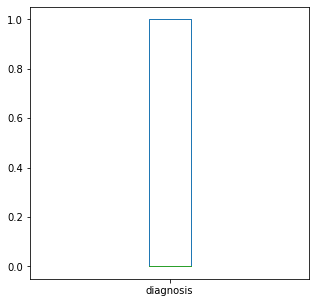

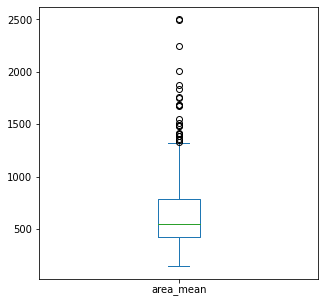

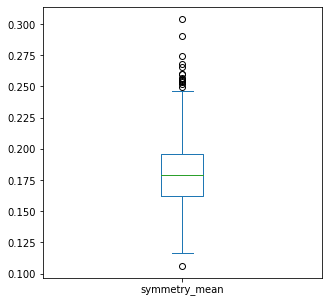

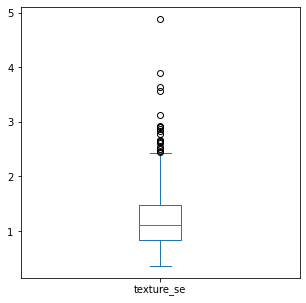

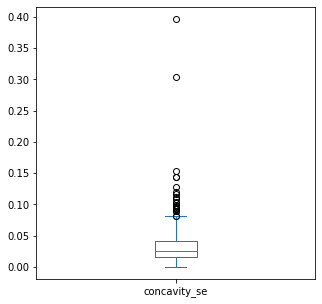

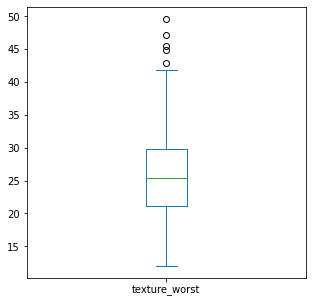

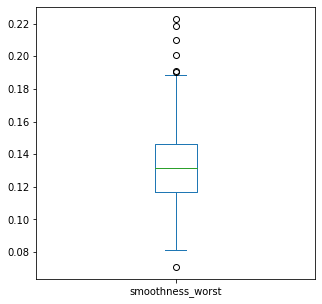

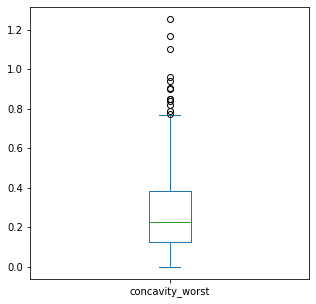

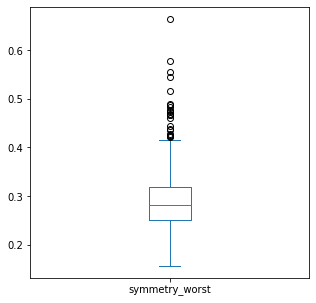

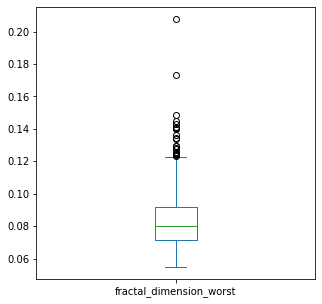

In [ ]:
for c in cancer.columns:
  cancer[c].plot(kind='box',figsize=(5,5))
  plot.show()

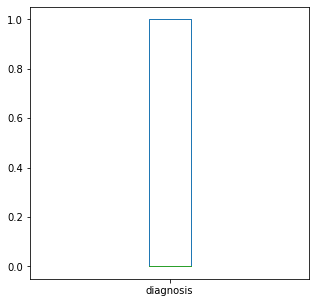

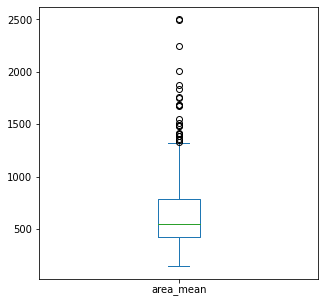

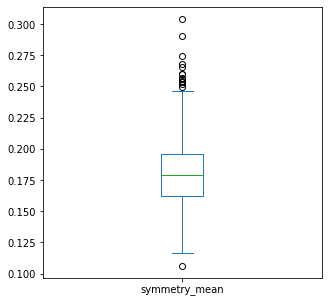

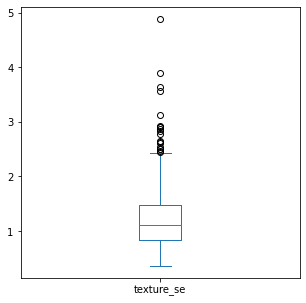

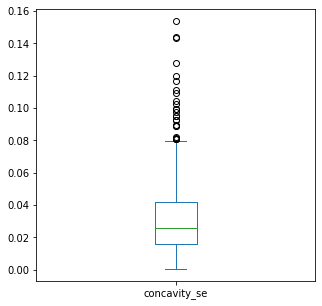

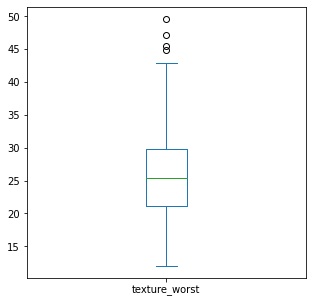

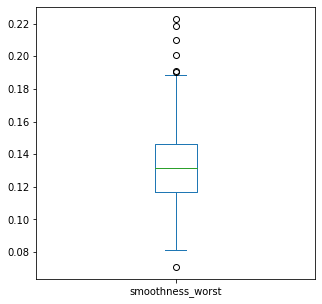

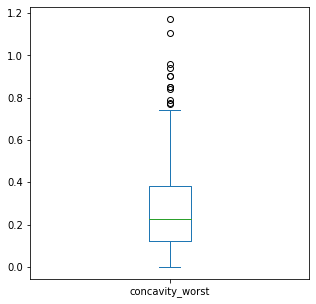

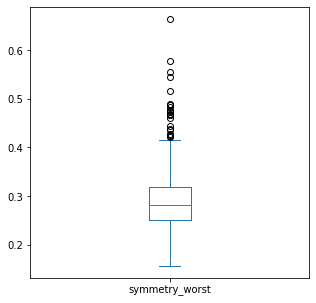

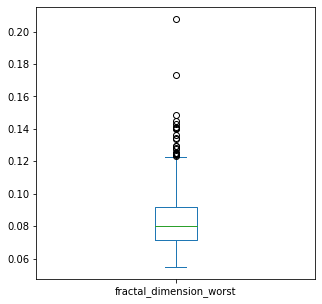

In [ ]:
cancer=cancer[cancer['concavity_se']<0.25]
for c in cancer.columns:
  cancer[c].plot(kind='box',figsize=(5,5))
  plot.show()

While individually there seems to be outliers or extreme data within each feature, clearly the outlier values are **concavity_se** with data points clearly far away from the rest (above 0.25). In the rest of the features, the data seem more plausible and infact shouldn't just be treated as outliers.

One thing I came across was not to just blindly remove the outliers or mathematically chop off the 5% ends of a data. I refererred this to come to this conclusion:

https://www.researchgate.net/post/Should_outliers_be_removed_before_or_after_data_transformation

In [ ]:
cancer_backup = cancer.copy(deep=True)

**Step 2H: Z Score Normalisation**

We want to standardise all the features to have similar or comparable ranges of data. We will first standardise the data using z score standardisation. Refer to the article : https://www.statology.org/z-score-normalization/

In [ ]:
diagnosis=cancer['diagnosis']
cancer.drop({"diagnosis"}, axis=1, inplace=True)
old_mean = cancer.mean()
#print("Old Mean:" ,old_mean)
old_std = cancer.std(ddof=0)
#print("Old Standard Deviation: ",old_std)
cancer = (cancer - old_mean)/old_std
new_mean=cancer.mean()
new_std=cancer.std(ddof=0)
#print("New Mean:" ,new_mean)
#print("New Standard Deviation: ",new_std)
print(cancer.describe())

          area_mean  symmetry_mean    texture_se  concavity_se  texture_worst  \
count  5.670000e+02   5.670000e+02  5.670000e+02  5.670000e+02   5.670000e+02   
mean   2.694298e-16   7.268338e-16 -2.678633e-16  6.265809e-17  -1.378478e-16   
std    1.000883e+00   1.000883e+00  1.000883e+00  1.000883e+00   1.000883e+00   
min   -1.458699e+00  -2.753147e+00 -1.556457e+00 -1.337800e+00  -2.225193e+00   
25%   -6.709249e-01  -7.005652e-01 -6.959916e-01 -6.736980e-01  -7.491599e-01   
50%   -2.973794e-01  -6.532970e-02 -1.937804e-01 -2.342459e-01  -4.124991e-02   
75%    3.680608e-01   5.331870e-01  4.722508e-01  4.468754e-01   6.674738e-01   
max    5.248335e+00   4.517178e+00  6.688846e+00  5.326243e+00   3.880734e+00   

       smoothness_worst  concavity_worst  symmetry_worst  \
count      5.670000e+02     5.670000e+02    5.670000e+02   
mean      -8.145552e-16     1.754427e-16    3.258221e-16   
std        1.000883e+00     1.000883e+00    1.000883e+00   
min       -2.678179e+00    -1.

As we can see from the new and old, we have successfully normalised the data. The mean is now ~0 and standard deviation is ~1.


  **Step 2F: Splitting the data into train and test set**

Finally, once the data has been preprocessed, we need to split in into training and test set. This is so that we can train the model on one set and test it against the other so that we can measure the accuracy of our model.

I have chosen to take 80% of the data (455 rows) to train the model while the rest 20% of the data (114 rows) will be used to test the model's accuracy. This concludes the preprocessing steps.

In [ ]:
cancer_train = cancer.loc[:454].copy(deep=True)
diagnosis_train = diagnosis.loc[:454].copy(deep=True)
diagnosis_test = diagnosis.loc[455:].copy(deep=True)
cancer_test = cancer.loc[455:].copy(deep=True)
diagnosis_train = diagnosis.loc[:454].copy(deep=True)
diagnosis_test = diagnosis.loc[455:].copy(deep=True)
cancer_train_backup = cancer_train
cancer_test_backup = cancer_test
# note that loc is inclusive of both bounds unlike python's regular lower bound inlcusion

**Step 3: Logistic regression (multivariate)**

  **Step 3A: Deciding on the input feature/variable (feature selection)**

The output feature that the hypothesis will be guessing will be the diagnosis feature from the dataset. However, we need to decide upon the input features for the model. This we have done during the data processing step as part of dropping features through variance and corelation

  **Step 3B: Deciding on the output or predicted variable/feature**

Obviously, from the dataset we have to determine if the given tumour and its feature makes it malignant (cancerous) or benign (non cancerous). This is abbreviated to M and B in the dataset under **diagnosis** feature.

With the input and output features decided, we can visualise the data on a 2D graph:

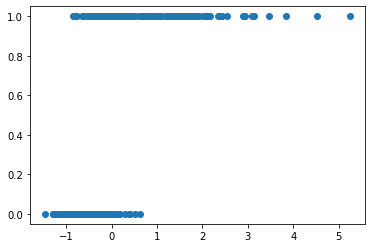

In [ ]:
plot.scatter(cancer_train['area_mean'], diagnosis_train) # by changing the column name we can see how each feature plots against the predicted diagnosis
plot.show()

**Step 3C: Running gradient descent**


> Return an array of ones of any dimension => Use **np.ones()**
>
>[ https://numpy.org/doc/stable/reference/generated/numpy.ones.html ]
>
> **arr = np.stack((arr,arr))** => stack arrays from left to right to form a matrix
>
>[ https://numpy.org/devdocs/reference/generated/numpy.stack.html#numpy.stack ]
>
> X_r2=cancer_train['radius_mean'].**to_numpy()** => convert a column into a 1D array
>
>[ https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html ]
>
> For matrix multiplication, use **np.dot()** or **np.matmul()**
>
>[ https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dot.html ]


In [ ]:
# Maybe more than one run if we get really bad random theta
m=len(cancer_train.index)   # number of training sets are there
n=cancer_train.shape[1]
alpha = 0.01   #learning rate

X=np.ones((1,m))
for c in cancer_train.columns:
  if c == 'id' or c == 'diagnosis':
    continue
  X_r = cancer_train[c].to_numpy().reshape((1,m))
  X=np.concatenate((X,X_r))  #X0 to Xn are here

theta = np.random.rand(n+1).reshape((1,n+1))   # theta 0 to theta n are here

y = diagnosis_train.to_numpy().reshape((1,m))  # y or the expected output is here

cost_list = []
cost_list.append(1e10) # starting off with a large value for the cost function. From here we will optimise down to minimum
iter = 0 # keeping track of iterations
run=True
while run:
  
  iter+=1

  # we are calculating 1/1+e^-z where z = theta * X 
  Z=np.dot(theta,X) 
  prediction = 1 / (1 + np.exp(-Z))
  
  # we are calculating the negative log likelihood function <=> cost = np.sum(-(y * np.log(prediction) + (1 - y) * np.log(1 - prediction))) / m
  log_pred = np.log(prediction.T)
  costTrue=np.dot(y,log_pred)
  log_1_pred = np.log(1-prediction.T)
  costFalse=np.dot(1-y,log_1_pred)
  temp=(costTrue+costFalse)/(-1*m)

  cost_list.append(temp[0][0]) # it is a 1x1 matrix that is why we need to access through [0][0]

  theta -= alpha * (1/m) * np.matmul((prediction-y),X.T) # simultaneous theta 0 to theta n update 
  
  changeInCost = cost_list[iter-1]-cost_list[iter] # change in cost between every iteration
  if changeInCost < 1e-8: # if the change is small enough then we say gradient descent has converged to the minima
    run=False # so we break out of the loop

dummy=cost_list.pop(0) # removing the large value we appended in the beginning

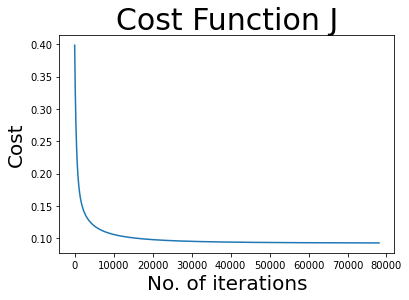

In [ ]:
# plotting the progress of the how gradient descent minimizes the cost function for every iteration
plot.title('Cost Function J', size = 30)
plot.xlabel('No. of iterations', size=20)
plot.ylabel('Cost', size=20)
plot.plot(cost_list)
plot.show()

In [ ]:
# the trained values of theta's
print(theta)
print(theta.shape)

[[-0.30502917  5.76244245  0.52908906 -0.29006608 -0.12087178  1.89558024
   1.89724415  1.60441967  0.26202357 -0.593163  ]]
(1, 10)


**Step 4:Testing/Verifying against test data**

In [ ]:
test_m = len(cancer_test.index)
X=np.ones((1,test_m))
for c in cancer_train.columns:
  if c == 'id' or c == 'diagnosis': # we are ignoring these columns
    continue
  X_r = cancer_test[c].to_numpy().reshape((1,test_m))
  X=np.concatenate((X,X_r))  #X0 to Xn are here

loss=np.matmul(theta,X)
loss=1 / (1 + np.exp(-1*(loss))) # this will have the predicted probabilites
test_predictions=np.where(loss<0.5,0,1) # this will convert the probabilities into predictions with >=0.5 probability as the threshold of predicting 1

**Step 5: Calculating F1 score**

In [ ]:
no_true_1 = 0   # true positives
no_false_1 = 0  # false positives
no_false_0 = 0  # false negatives
for i,j in zip(test_predictions[0],diagnosis_test):
  #print(i," ",j)
  if i==1:
    if j==1:
      no_true_1+=1;
    else:
      no_false_1+=1
  else:
    if j==1:
      no_false_0+=1
precision = (1.0*no_true_1)/(1.0*(no_true_1+no_false_1))
recall = (1.0*no_true_1)/(1.0*(no_true_1+no_false_0))
f1 = 2*((precision*recall)/(precision+recall))
print("true positives=",no_true_1)
print("false positives=",no_false_1)
print("false negatives= ",no_false_0)
print("F1 score=",f1)

true positives= 26
false positives= 4
false negatives=  0
F1 score= 0.9285714285714286


*Just wanted to note that false negatives are 0 which means we aren't telling a cancer positive person that they don't have cancer lol*

**Gaussian Naive Bayes Classifier**

We are recreating the data before we did Z score normalisation. The reason I want to start with this is that I don't want to change any of the mean or variance of the data by doing the normalisation.

In [ ]:
cancer=cancer_backup
diagnosis=cancer['diagnosis']
cancer_train = cancer.loc[:454].copy(deep=True)
diagnosis_train = diagnosis.loc[:454].copy(deep=True)
diagnosis_test = diagnosis.loc[455:].copy(deep=True)
cancer_test = cancer.loc[455:].copy(deep=True)
cancer_train_backup = cancer_train
cancer_test_backup = cancer_test
cancer_test.drop("diagnosis",axis=1,inplace=True)
print(cancer_test.head())

     area_mean  symmetry_mean  texture_se  concavity_se  texture_worst  \
455      557.2         0.1375       1.924      0.007936          41.61   
456      415.1         0.1799       2.426      0.042750          38.81   
457      537.9         0.1619       1.350      0.015100          34.23   
458      520.2         0.1667       1.232      0.005681          31.88   
459      290.9         0.1621       1.687      0.014500          36.92   

     smoothness_worst  concavity_worst  symmetry_worst  \
455            0.1172          0.07003          0.2196   
456            0.1406          0.29230          0.2884   
457            0.1289          0.13900          0.2444   
458            0.1218          0.04462          0.2306   
459            0.1110          0.07190          0.2321   

     fractal_dimension_worst  
455                  0.07675  
456                  0.07220  
457                  0.06788  
458                  0.06291  
459                  0.07211  


So as the bayes formula goes, we are calculating the prior of each class ( 2 classes, benign and malignant) probability here. This is taken for the entire dataset to get a more accurate prediction of the probability.

In [ ]:
prior = np.log(cancer.groupby('diagnosis').size().div(len(cancer)))
# this means prior = the probability of B(0) and M(1) occuring within our dataset i.e P(h)
print(prior)

diagnosis
0   -0.468242
1   -0.983773
dtype: float64


We then calculate the mean and variance (Mew and Sigma Square) of each feature grouping by the classes in the test part of our dataset. This is the end of "training" our model so to speak

In [ ]:
mean_train=cancer_train.groupby(['diagnosis']).mean()
variance_train=cancer_train.groupby(['diagnosis']).var()
#print(mean_train)
#print(variance_train)
# we need this to create the gaussian distribution curve

We then calculate the log likelihood for the test assuming the gaussian distribution of the data. This is why we "trained" the mean and variance, so as to apply in the gaussian equation.

In [34]:
predictions=[]
for i in cancer_test.index:
  log_li=[0.0,0.0]
  for c in cancer_test.columns:
    temp = -0.5*(np.log(2*np.pi*variance_train[c]))  - 0.5*((cancer[c][i]-mean_train[c])**2)/variance_train[c]
    log_li += temp.to_numpy() #0th index is Benign likelihood and 1st index is Malignant likelihood (both are logged)
  if log_li[0]>log_li[1]:
    predictions.append(0)
  else:
    predictions.append(1)

We then calculate the F1 score using the following formulas:

Precision = true +ve / (true +ve + false +ve)

Recall = true +ve / (true +ve + false -ve)

F1 score = 2 * { (Precision * Recall)/(Precision + Recall) }

In [ ]:
actual = diagnosis_test.to_numpy()
no_true_1 = 0   # true positives
no_false_1 = 0  # false positives
no_false_0 = 0  # false negatives
for i,j in zip(predictions,actual):
  #print(i," ",j)
  if i==1:
    if j==1:
      no_true_1+=1;
    else:
      no_false_1+=1
  else:
    if j==1:
      no_false_0+=1
precision = (1.0*no_true_1)/(1.0*(no_true_1+no_false_1))
recall = (1.0*no_true_1)/(1.0*(no_true_1+no_false_0))
f1 = 2*((precision*recall)/(precision+recall))
print("true positives=",no_true_1)
print("false positives=",no_false_1)
print("false negatives= ",no_false_0)
print("F1 score=",f1)

true positives= 25
false positives= 9
false negatives=  1
F1 score= 0.8333333333333333


Finally, it was mentioned to investigate why we need gaussian naive bayes. I tried to run regular vanilla naive bayes but soon realised that every value in every feature ends up being a class of value. This is a huge problem with datasets like breast cancer where almost all features behave like contious values and also means that we will most likely get values who will not be present in the posterior probability as well.

Hence we go for gaussian which allows us to treat the features as a continous distribution and calculate likelihood based on the gaussian curve.